In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units

In [2]:
# Define column names (based on your data structure)
col_names = [
    'time', 'xx1', 'Ta', 'RH', 'v_SN', 'u_EW', 'Height', 'press', 'Td',
    'MR', 'DD', 'FF', 'Ascend_FLG', 'xx2', 'xx3', 'Lon', 'Lat',
    'xx4', 'xx5', 'xx6'
]

# Load the data, skipping the header lines (adjust `skiprows` as needed)
df = pd.read_csv('HUBV_RS41SGP_20250623_064505UT.mw41.dat', delim_whitespace=True, header=None,
                 names=col_names, na_values=-9999, skiprows=40)

# Drop rows where all elements are NaN
df = df.dropna(axis=0, how='all') 

# Filter to ascending portion
#df = df[df['Ascend_FLG'] == 1].copy()


/var/folders/90/529b_m6x0bg9s9w5vnxhrms00000gn/T/ipykernel_4987/2384335554.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('HUBV_RS41SGP_20250623_064505UT.mw41.dat', delim_whitespace=True, header=None,


In [3]:
pd.DataFrame(df.head())

,time,xx1,Ta,RH,v_SN,u_EW,Height,press,Td,MR,DD,FF,Ascend_FLG,xx2,xx3,Lon,Lat,xx4,xx5,xx6
0,0.00,NaN,297.08,100.00,0.00,0.00,52.3,1012.24,297.08,18.59,0.00,0.00,1,NaN,NaN,-76.8755,39.0563,NaN,NaN,NaN
1,0.59,NaN,296.99,90.38,0.40,0.84,57.9,1011.60,295.32,16.69,244.70,0.93,1,NaN,NaN,-76.8757,39.0564,NaN,NaN,NaN
2,1.59,NaN,297.35,87.93,0.58,1.36,62.0,1011.12,295.23,16.60,246.68,1.48,1,NaN,NaN,-76.8757,39.0564,NaN,NaN,NaN
3,2.59,NaN,297.97,84.25,0.65,1.66,66.0,1010.66,295.14,16.51,248.57,1.79,1,NaN,NaN,-76.8757,39.0564,NaN,NaN,NaN
4,3.59,NaN,299.01,79.11,0.65,1.86,72.1,1009.96,295.13,16.51,250.80,1.97,1,NaN,NaN,-76.8757,39.0564,NaN,NaN,NaN


In [4]:
ds = df[::40]

In [18]:
# Attach proper units
pressure = df['press'].values * units.hPa            # Already in hPa
temperature = df['Ta'].values * units.kelvin         # K from your sample
dewpoint = df['Td'].values * units.kelvin            # K from your sample
u = df['u_EW'].values * units.knots                  # Convert from knots
v = df['v_SN'].values * units.knots                  # Convert from knots

# Convert temperature to Celsius if needed
temperature = temperature.to('degC')  # Convert to Celsius
dewpoint = dewpoint.to('degC')  # Convert to Celsius

# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(pressure, temperature[0], dewpoint[0])
lcl_temperature = lcl_temperature.to('degC')

print(lcl_pressure, lcl_temperature)

# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')

[1012.24 1011.6 1011.12 ... 8.09 8.09 8.08] hectopascal [23.930000000000007 23.930000000000007 23.930000000000007 ... 23.930000000000007 23.930000000000007 23.930000000000007] degree_Celsius


/var/folders/90/529b_m6x0bg9s9w5vnxhrms00000gn/T/ipykernel_4987/2515963301.py:19: UserWarning: Duplicate pressure(s) [8.09 8.11 8.13 8.14 8.15 8.17 8.19 8.21 8.22 8.23 8.24 8.25 8.26 8.27 8.28 8.29 8.3 8.31 8.32 8.33 8.35 8.36 8.38 8.39 8.4 8.41 8.42 8.43 8.45 8.47 8.48 8.49 8.5 8.52 8.53 8.54 8.55 8.56 8.57 8.58 8.6 8.61 8.62 8.63 8.64 8.65 8.66 8.67 8.68 8.69 8.7 8.72 8.73 8.75 8.77 8.78 8.79 8.8 8.81 8.83 8.84 8.85 8.86 8.88 8.9 8.92 8.93 8.96 8.98 9.0 9.01 9.02 9.04 9.06 9.08 9.11 9.13 9.17 9.18 9.19 9.2 9.26 9.29 9.32 9.34 9.36 9.44 9.47 9.5 9.52 9.54 9.55 9.65 9.67 9.71 9.75 9.77 9.79 9.81 9.85 9.87 9.89 9.92 9.96 9.98 10.0 10.03 10.05 10.07 10.11 10.14 10.17 10.19 10.2 10.23 10.26 10.27 10.29 10.31 10.33 10.36 10.39 10.41 10.43 10.45 10.46 10.47 10.49 10.55 10.58 10.6 10.62 10.67 10.7 10.72 10.75 10.77 10.79 10.81 10.85 10.87 10.89 10.9 10.93 11.03 11.05 11.07 11.09 11.12 11.15 11.19 11.21 11.24 11.4 11.42 11.51 11.54 11.63 11.71 11.8 11.83 11.9 11.96 12.08 12.12 12.17 12.32 12.

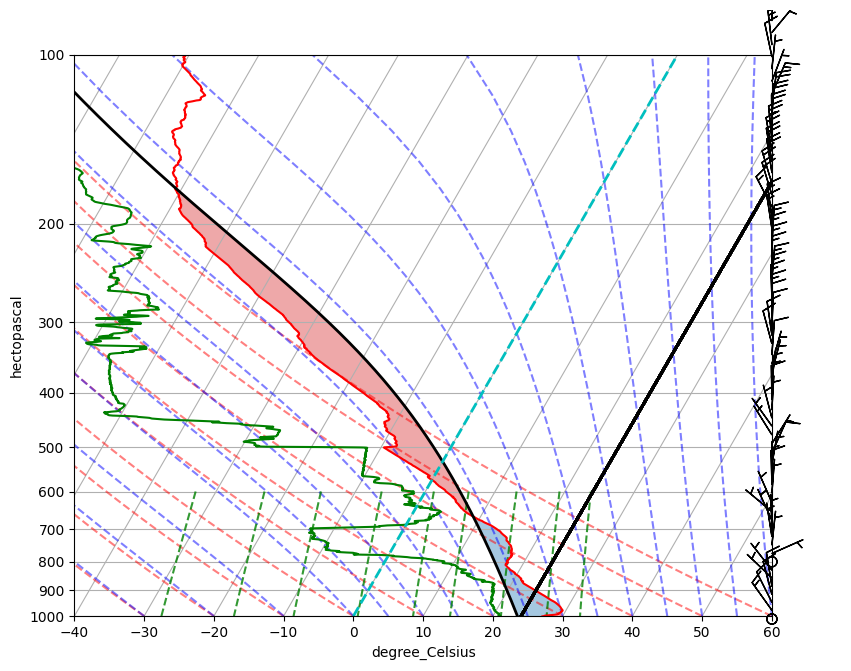

In [19]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
#skew.plot(ds['press'], ds['Ta'], 'r', label='Temperature (C)')
#skew.plot(ds['press'], ds['Td'], 'g', label='Dew Point (C)')
#skew.plot_barbs(ds['press'], ds['u_EW'], ds['v_SN'], label='Wind Barbs')
#skew.ax.set_ylim(1000, 100)  # Set Y limits
#skew.ax.set_xlim(-40, 60)  # Set X limits

skew.plot(pressure, temperature, 'r')
skew.plot(pressure, dewpoint, 'g')
skew.plot_barbs(pressure[::70], u[::70], v[::70])
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)


# Plot LCL temperature as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black', markersize=1, label='LCL')

# Plot the parcel profile as a black line
skew.plot(pressure, parcel_prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(pressure, temperature, parcel_prof, dewpoint)
skew.shade_cape(pressure, temperature, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()